In [1]:
# dados
import sgs

# manipulacao basica dos dados
import pandas as pd
import numpy as np

# analise de series temporais
from statsmodels.stats import api as stats
from statsmodels.tsa import api as tsa

In [2]:
series = [22105, 22106, 22107, 22110]
labels = ['Agropecuária', 'Indústria', 'Serviços', 'Famílias']

data_inicial = '01-01-1996'
data_final = '01-01-2021'

dataf = sgs.dataframe(series, start= data_inicial, end=data_final)

In [3]:
dataf = dataf.rename(columns={s:l for s, l in zip(series, labels)})

In [4]:
dataf.head()

,Agropecuária,Indústria,Serviços,Famílias
1996-01-01,95.12,100.69,100.80,98.86
1996-04-01,96.59,97.05,102.31,100.93
1996-07-01,101.69,105.99,103.69,103.70
1996-10-01,126.16,99.54,101.56,109.13
1997-01-01,101.74,104.25,103.86,106.65


(-0.30598564380234483,
 0.924652297332135,
 4,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 573.8979732839358)

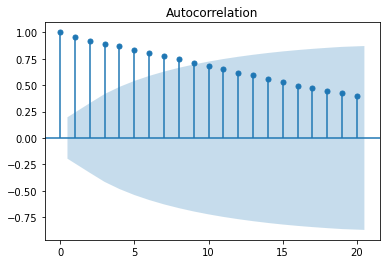

In [5]:
acf = tsa.graphics.plot_acf(dataf['Agropecuária'])
tsa.adfuller(dataf['Agropecuária'])

(-1.5447604445847587,
 0.5112643490359825,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 479.28370884037497)

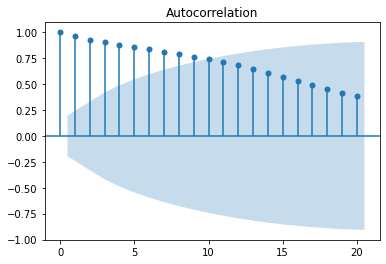

In [6]:
acf = tsa.graphics.plot_acf(dataf['Indústria'])
tsa.adfuller(dataf['Indústria'])

(-1.261678098049159,
 0.6465172835577605,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 403.8357908936755)

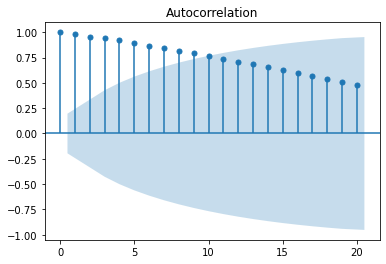

In [7]:
acf = tsa.graphics.plot_acf(dataf['Serviços'])
tsa.adfuller(dataf['Serviços'])

(-0.9295096263819744,
 0.7780992296553246,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 448.24804731458056)

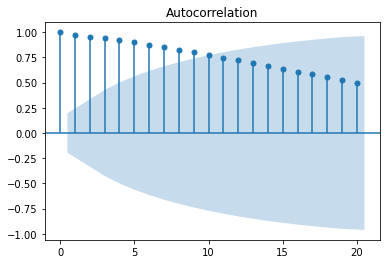

In [8]:
acf = tsa.graphics.plot_acf(dataf['Famílias'])
tsa.adfuller(dataf['Famílias'])

In [9]:
# diferenciação 1
df = dataf.diff(1)[1:]

(-7.18299686598927,
 2.620236817509198e-10,
 3,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 566.7963178635749)

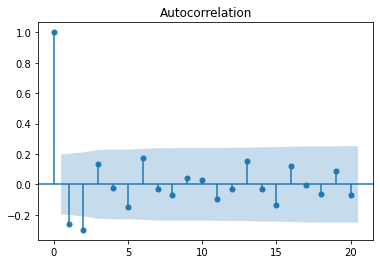

In [10]:
acf = tsa.graphics.plot_acf(df['Agropecuária'])
tsa.adfuller(df['Agropecuária'])

(-11.68048282560224,
 1.746213681992402e-21,
 0,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 477.2798344119583)

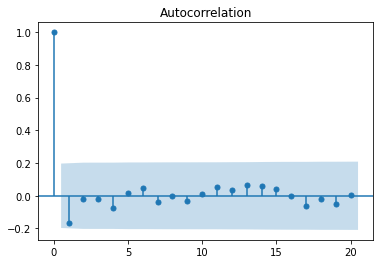

In [11]:
acf = tsa.graphics.plot_acf(df['Indústria'])
tsa.adfuller(df['Indústria'])

(-9.70148691125719,
 1.0692636480542159e-16,
 0,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 402.55970210462493)

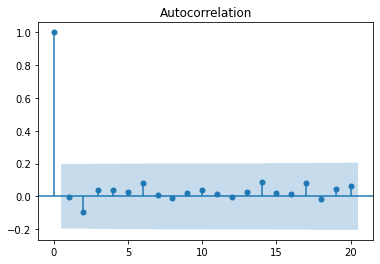

In [12]:
acf = tsa.graphics.plot_acf(df['Serviços'])
tsa.adfuller(df['Serviços'])

(-9.68146656985568,
 1.2014770267262538e-16,
 0,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 445.3816574177117)

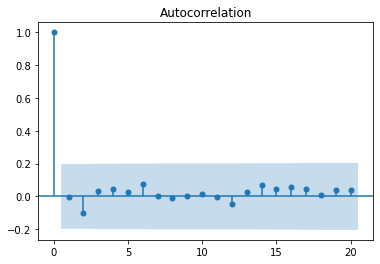

In [13]:
acf = tsa.graphics.plot_acf(df['Famílias'])
tsa.adfuller(df['Famílias'])

In [14]:
model = tsa.VAR(df, dates=df.index, freq='QS-OCT')
fit = model.fit(maxlags=16)

In [15]:
model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,7.541,7.653*,1884.,7.586*
1,7.570,8.129,1939.,7.795
2,7.512*,8.519,1836.*,7.918
3,7.750,9.204,2341.,8.336
4,7.869,9.770,2664.,8.635
5,8.031,10.38,3190.,8.978
6,8.261,11.06,4117.,9.388
7,8.300,11.54,4440.,9.607
8,8.510,12.20,5759.,9.998
9,8.661,12.80,7151.,10.33


In [16]:
fit = model.fit(maxlags=2)

In [17]:
fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           qua, 21, abr, 2021
Time:                     11:50:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.21499
Nobs:                     97.0000    HQIC:                   8.64581
Log likelihood:          -915.130    FPE:                    3872.17
AIC:                      8.25943    Det(Omega_mle):         2715.30
--------------------------------------------------------------------
Results for equation Agropecuária
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   2.114745         0.852484            2.481           0.013
L1.Agropecuária        -0.372413         0.095160           -3.914           0.000
L1.Indústria            0.599387         0.31

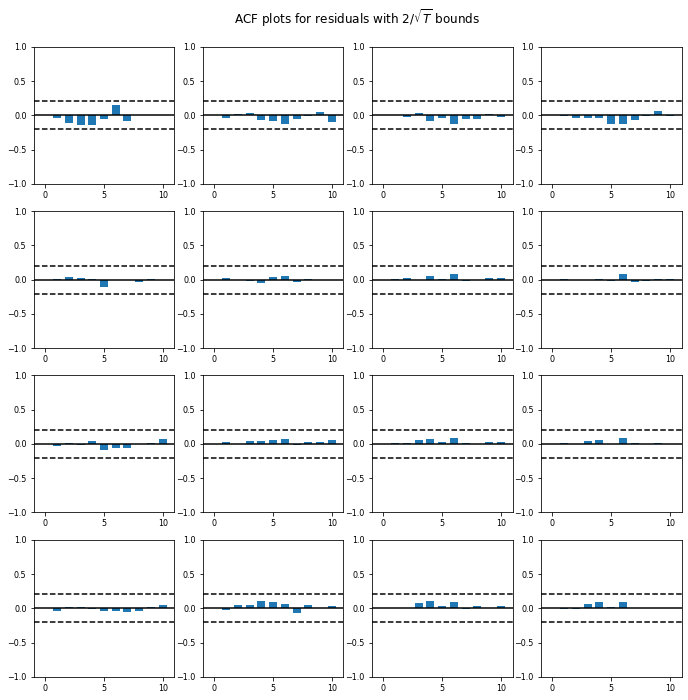

In [18]:
fig = fit.plot_acorr(resid=True)

In [19]:
stats.acorr_ljungbox(fit.resid['Agropecuária'], return_df=True, lags=np.arange(1, 13))

,lb_stat,lb_pvalue
1,0.179126,0.672126
2,1.364446,0.505492
3,3.381717,0.336430
4,5.305108,0.257399
5,5.632617,0.343623
6,7.941692,0.242406
7,8.588434,0.283570
8,8.590566,0.378003
9,8.590744,0.475876
10,8.600364,0.570403


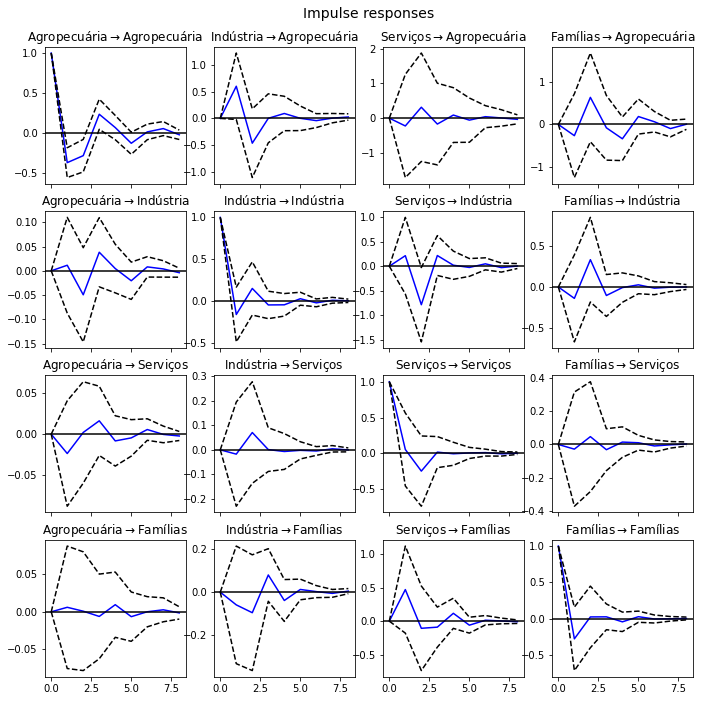

In [20]:
irf = fit.irf(8) # numero de lags arbitrariamente escolhido
irf_plot = irf.plot()

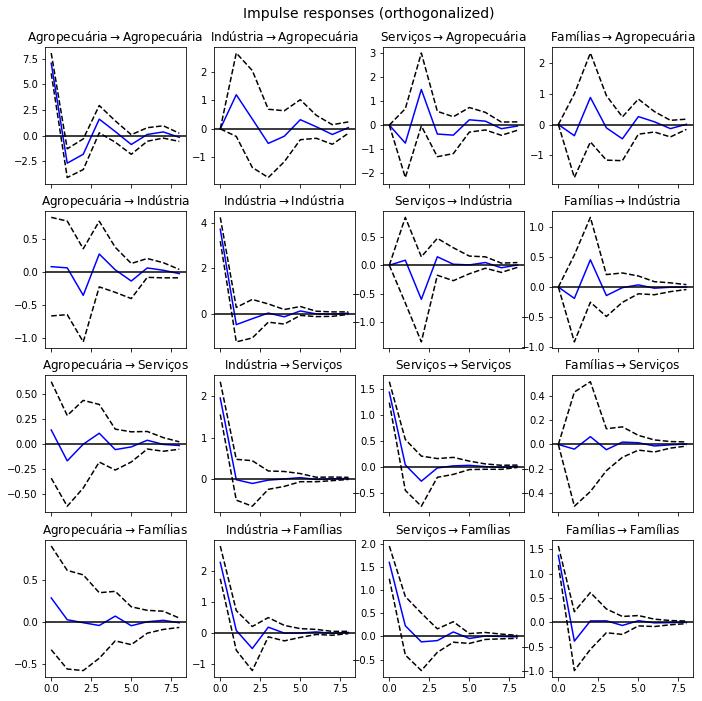

In [21]:
irf_plot = irf.plot(orth=True) # IRF Ortogonalizada

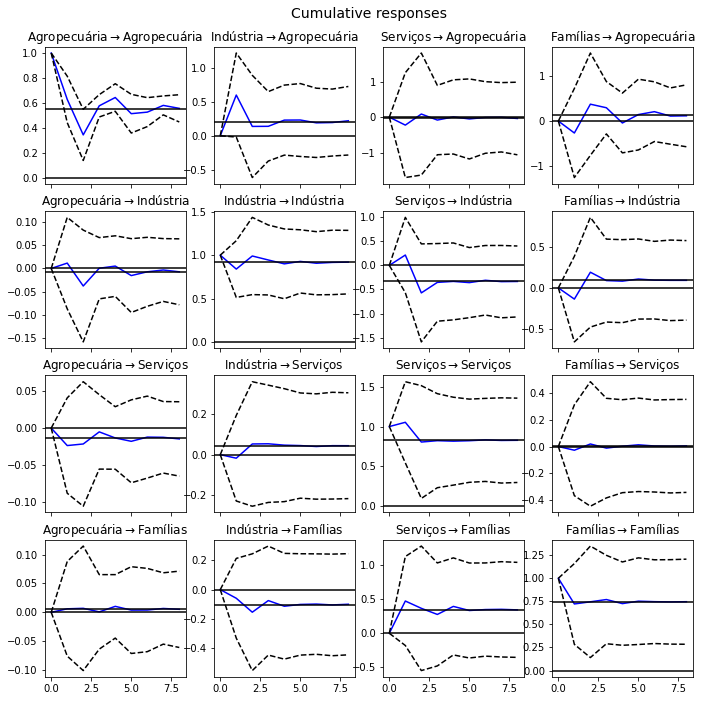

In [22]:
cum_responses = irf.plot_cum_effects() # IRF efeitos cumulativos

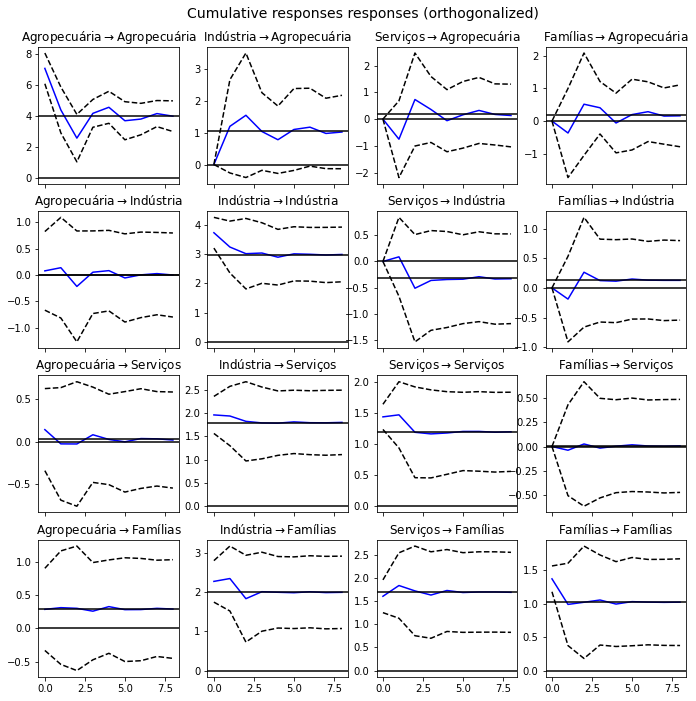

In [23]:
cum_responses = irf.plot_cum_effects(orth=True) # IRF ortogonalizada efeitos cumulativos